<div style="color:black;
           display:fill;
           border-radius:50px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            IMPORTING REQUIRED LIBRARIES
</p>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [47]:
from sklearn.ensemble import HistGradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [48]:
from google.colab import files
uploaded=files.upload()

Saving mental-and-substance-use-as-share-of-disease (1).csv to mental-and-substance-use-as-share-of-disease (1) (1).csv


In [49]:
df2=pd.read_csv("mental-and-substance-use-as-share-of-disease (1).csv")
df2=df2.fillna(0)

In [50]:
from google.colab import files
uploaded=files.upload()

Saving prevalence-by-mental-and-substance-use-disorder.csv to prevalence-by-mental-and-substance-use-disorder (1).csv


In [52]:
df1=pd.read_csv("prevalence-by-mental-and-substance-use-disorder.csv")
df1=df1.fillna(0)

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            READING DATA
</p>
</div>

In [53]:
df1.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


In [54]:
df2.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            MERGING TWO DATASETS
</p>
</div>

In [55]:
data = pd.merge(df1, df2)
data.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44,1.696670
1,Afghanistan,AFG,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44,1.734281
2,Afghanistan,AFG,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45,1.791189
3,Afghanistan,AFG,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45,1.776779
4,Afghanistan,AFG,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45,1.712986


<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
            DATA CLEANING
</p>
</div>

In [56]:
data.isnull().sum()

Entity                                                                                             0
Code                                                                                               0
Year                                                                                               0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized                  0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized                        0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized                         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized                        0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized                     0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)           

In [57]:
data.drop('Code',axis=1,inplace=True)

In [58]:
data.head()

,Entity,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44,1.696670
1,Afghanistan,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44,1.734281
2,Afghanistan,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45,1.791189
3,Afghanistan,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45,1.776779
4,Afghanistan,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45,1.712986


In [59]:
data.size,data.shape

(68100, (6810, 10))

In [60]:
data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)

In [61]:
data.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44,1.696670
1,Afghanistan,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44,1.734281
2,Afghanistan,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45,1.791189
3,Afghanistan,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45,1.776779
4,Afghanistan,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45,1.712986


<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
              EXPLORATORY ANALYSIS
</p>
</div>

[]

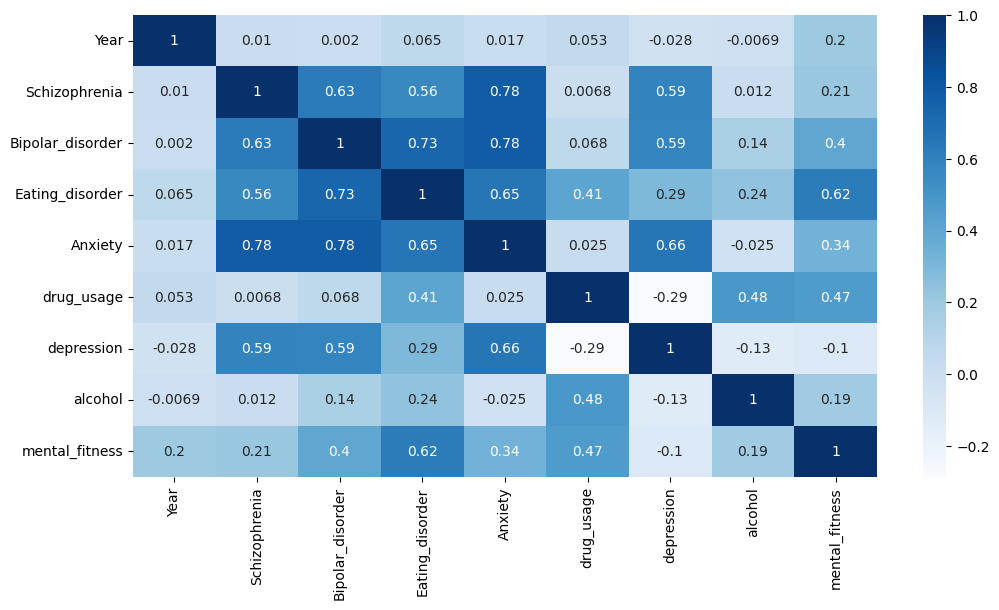

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

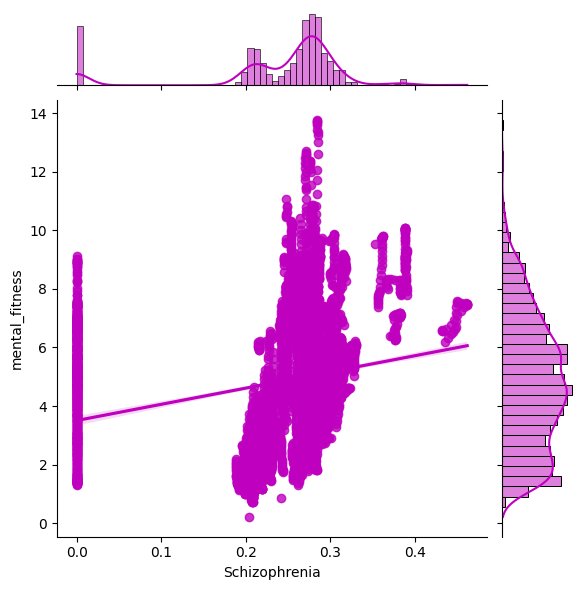

In [63]:
sns.jointplot(data=data,x='Schizophrenia',y='mental_fitness',kind='reg',color='m')
plt.show()

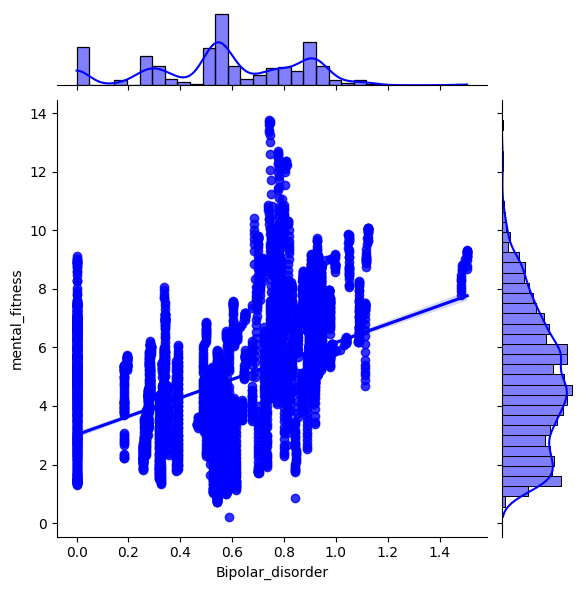

In [64]:
sns.jointplot(data=data,x='Bipolar_disorder',y='mental_fitness',kind='reg',color='blue')
plt.show()


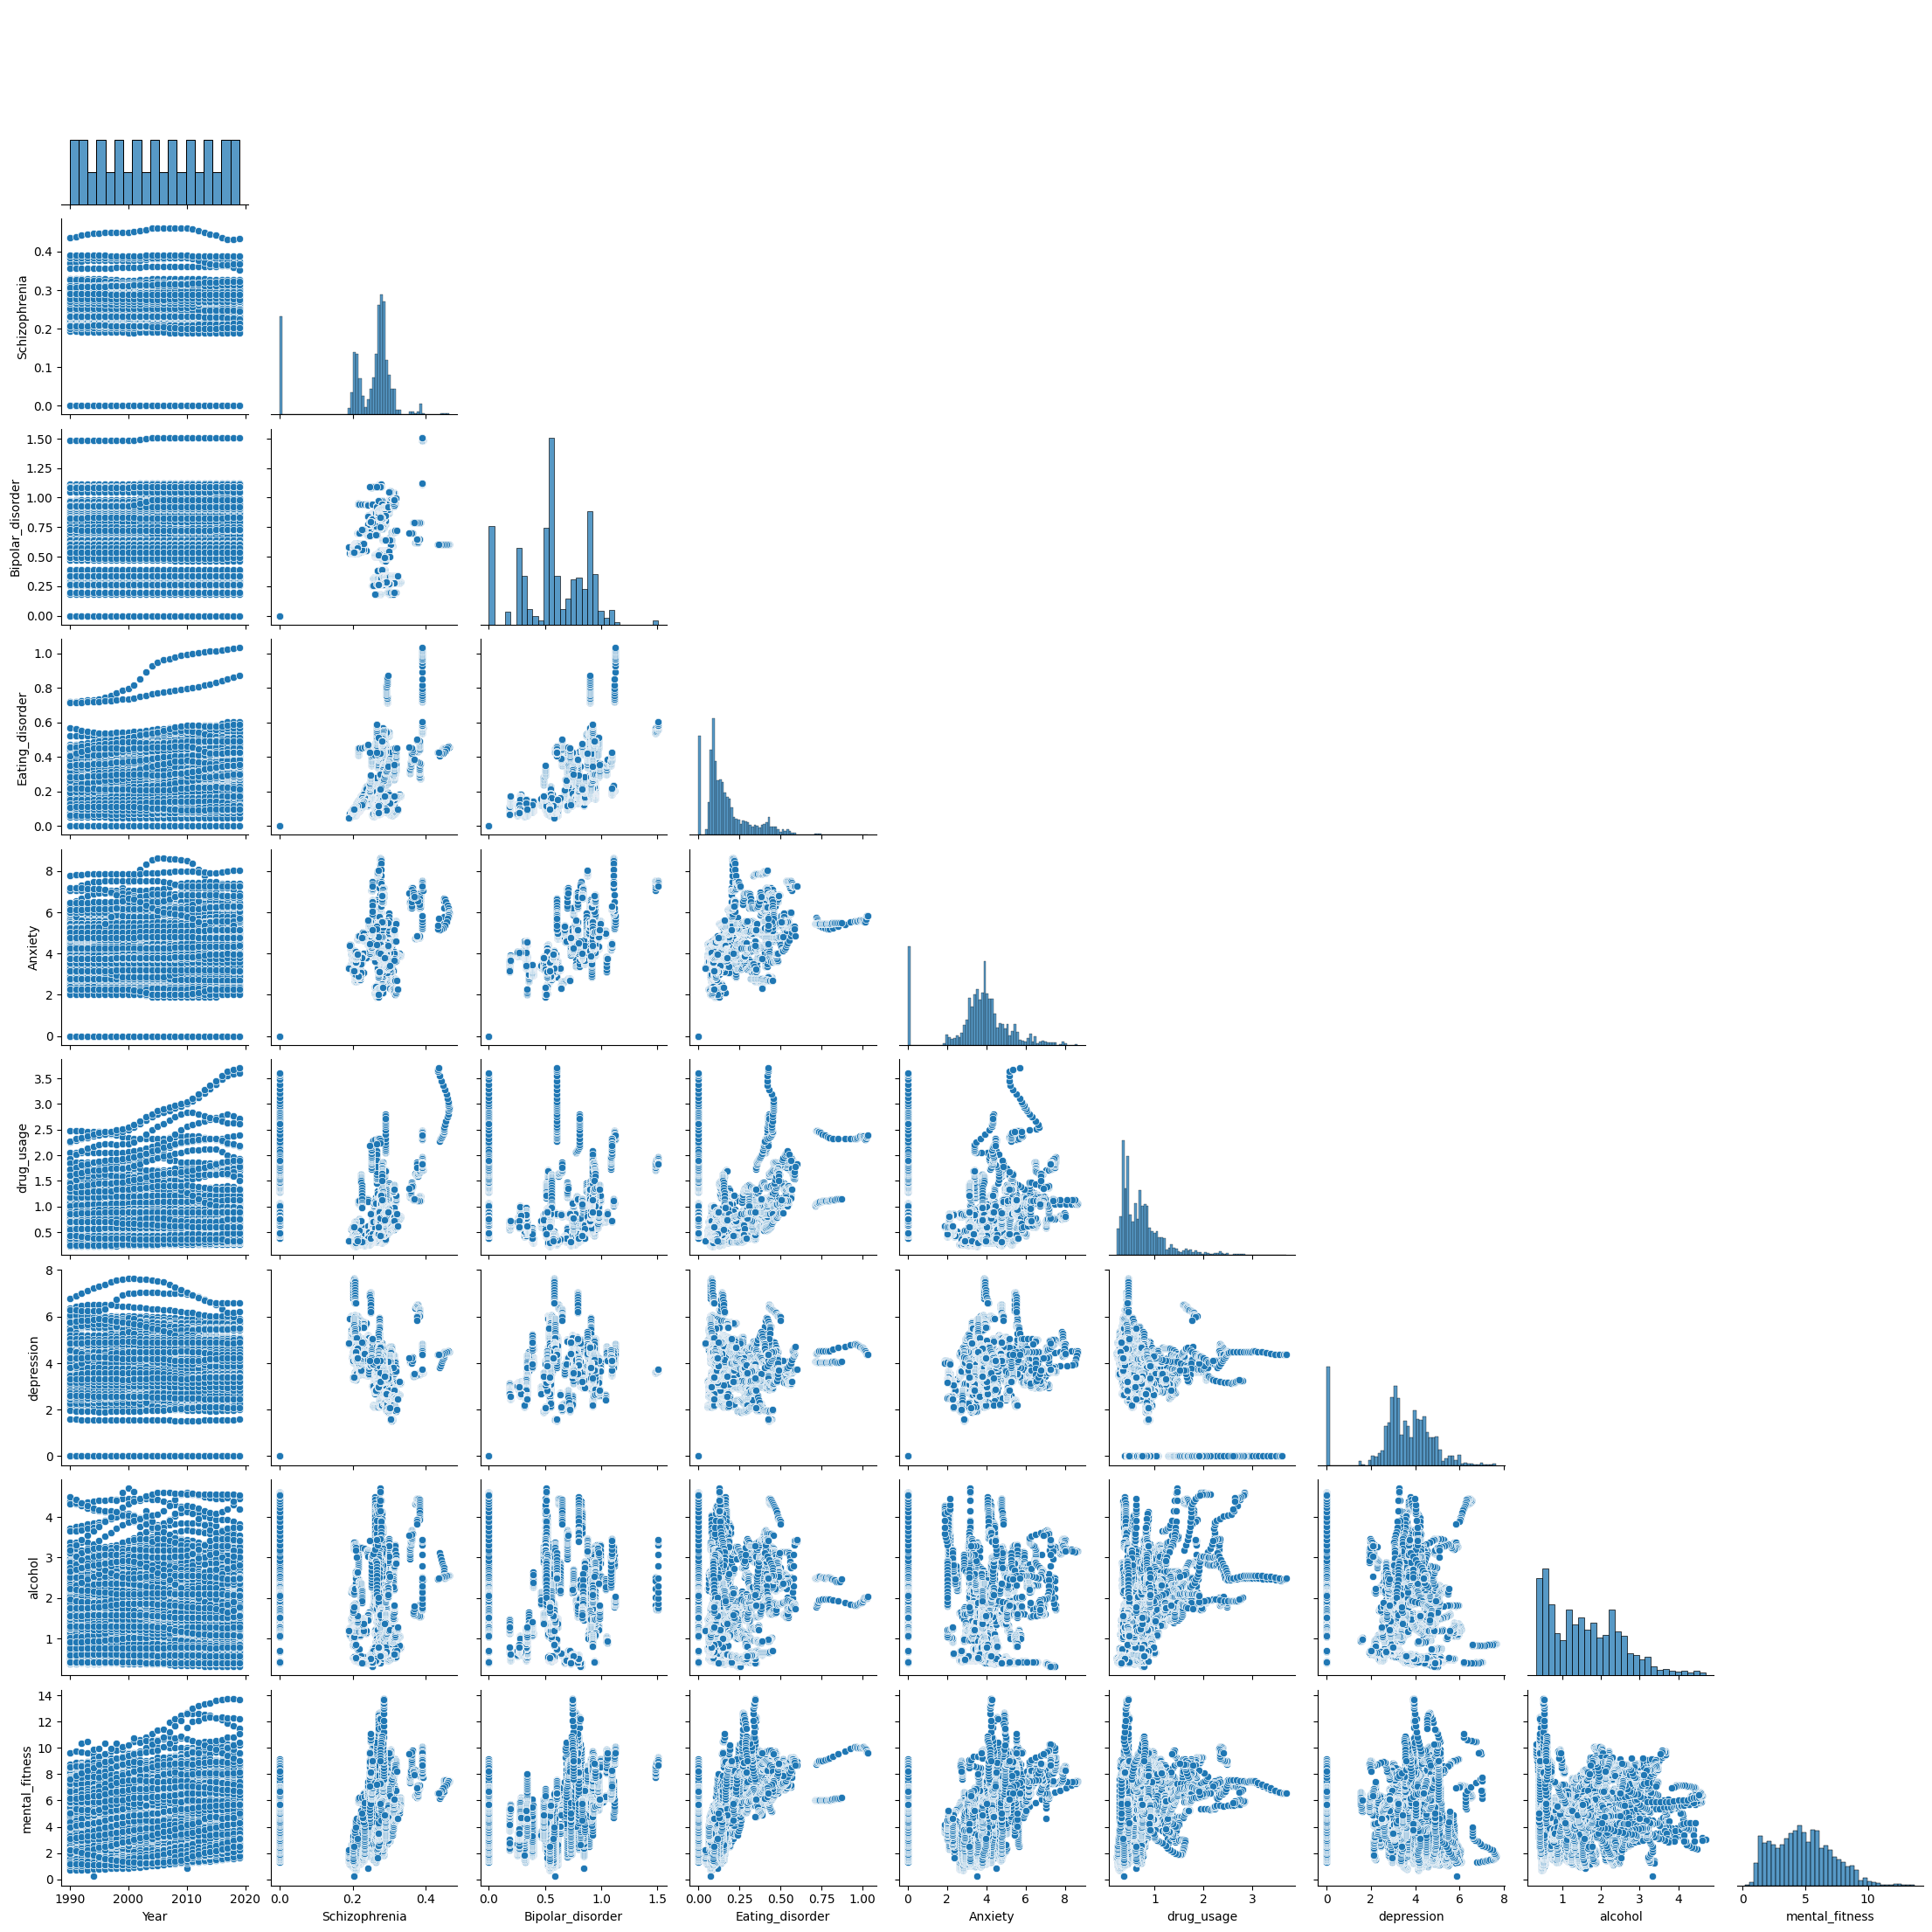

In [65]:
sns.pairplot(data,corner=True)
plt.show()

In [66]:
mean = data['mental_fitness'].mean()
mean

4.827487737229286

In [67]:
fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()

In [68]:
fig=px.bar(data.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
              YEARWISE VARIATIONS IN MENTAL FITNESS OF DIFFERENT COUNTRIES
</p>
</div>

In [69]:

fig = px.line(data, x="Year", y="mental_fitness", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [70]:
df = data.copy()

In [71]:
df.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44,1.696670
1,Afghanistan,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44,1.734281
2,Afghanistan,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45,1.791189
3,Afghanistan,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45,1.776779
4,Afghanistan,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45,1.712986


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6810 entries, 0 to 6809
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6810 non-null   object 
 1   Year              6810 non-null   int64  
 2   Schizophrenia     6810 non-null   float64
 3   Bipolar_disorder  6810 non-null   float64
 4   Eating_disorder   6810 non-null   float64
 5   Anxiety           6810 non-null   float64
 6   drug_usage        6810 non-null   float64
 7   depression        6810 non-null   float64
 8   alcohol           6810 non-null   float64
 9   mental_fitness    6810 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 585.2+ KB


In [73]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [74]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [75]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

<div style="color:black;
           display:fill;
           border-radius:25px;
           background-color:#9DFC8E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
              RANDOM FOREST REGRESSOR
</p>
</div>

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.005541076845430554
RMSE is 0.0744384097454436
R2 score is 0.9989676435918208


The model performance for testing set
--------------------------------------
MSE is 0.03010163076325607
RMSE is 0.17349821544689176
R2 score is 0.993777093116622


### RANDOM FOREST PERFORMS WELL ON BOTH TRAINING AND TESTING DATA